# Assignment 1 - Question 2
_Mohamed Amine Arfaoui_

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras.optimizers import sgd


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(x_train.shape[0]))
print("- Test-set:\t\t{}".format(x_test.shape[0]))
print(" Shape of train target set:{}".format(y_train.shape))

Size of:
- Training-set:		60000
- Test-set:		10000
 Shape of train target set:(60000,)


Let's perform a one hot encoding on _y_train_ so that it have the sahpe (60000,10):

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))
y_train_onehot = enc.transform(y_train.reshape(-1, 1)).toarray()
y_train_onehot.shape

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(60000, 10)

Same for _y_test_

In [5]:
enc = OneHotEncoder()
enc.fit(y_test.reshape(-1, 1))
y_test_onehot = enc.transform(y_test.reshape(-1, 1)).toarray()
y_test_onehot.shape

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(10000, 10)

## Sequential Model


We create our sequential model by stacking layers:

In [6]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer 
model.add(InputLayer(input_shape=((28, 28))))

# Convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape((28, 28, 1)))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=512, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=128, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# Last fully-connected / dense layer with softmax-activation for use in classification.
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 14, 14, 512)       5120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 512)         0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 4, 4, 128)         589952    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total para

In [8]:
optimizer = sgd(lr=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training

In [9]:
%%time
history = model.fit(x=x_train, y=y_train_onehot, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 278s 5ms/step - loss: 6.8456 - acc: 0.5450
Epoch 2/10
60000/60000 [==============================] - 276s 5ms/step - loss: 2.8976 - acc: 0.7744
Epoch 3/10
60000/60000 [==============================] - 275s 5ms/step - loss: 1.5099 - acc: 0.8730
Epoch 4/10
60000/60000 [==============================] - 276s 5ms/step - loss: 0.1369 - acc: 0.9581
Epoch 5/10
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0981 - acc: 0.9696
Epoch 6/10
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0804 - acc: 0.9752
Epoch 7/10
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0696 - acc: 0.9782
Epoch 8/10
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0602 - acc: 0.9815
Epoch 9/10
60000/60000 [==============================] - 279s 5ms/step - loss: 0.0537 - acc: 0.9834
Epoch 10/10
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0483 - a

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Accuracy plot

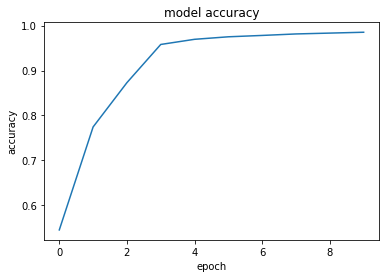

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

#### Loss plot

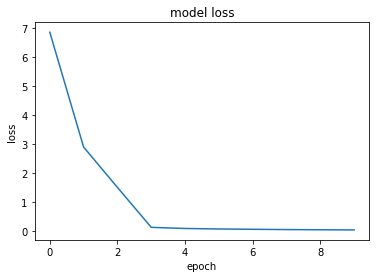

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Evaluation


In [13]:
result = model.evaluate(x_test, y_test_onehot)

10000/10000 [==============================] - 9s 924us/step


Performance metrics for the test-set.

In [14]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.07816724474669899
acc 0.9773
